In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd, os

# === STEP 1: Set your correct file path below ===
path ="/content/seafood_prices_2000_2025_indian_cities.csv"
# === STEP 2: Check file exists ===
print("File exists:", os.path.exists(path))
if not os.path.exists(path):
    raise FileNotFoundError("⚠️ File not found! Check your path above.")

# === STEP 3: Read first 10 rows ===
df = pd.read_csv(path, nrows=10)
print("\n--- Columns ---")
print(df.columns.tolist())

print("\n--- First 10 Rows ---")
print(df.head(10).to_string())

# === STEP 4: Read a small sample for diagnostics ===
df_sample = pd.read_csv(path, nrows=5000)
print("\nShape of sample:", df_sample.shape)

# === STEP 5: Try to identify main fields automatically ===
date_cols = [c for c in df_sample.columns if 'date' in c.lower() or 'day' in c.lower()]
city_cols = [c for c in df_sample.columns if 'city' in c.lower() or 'market' in c.lower() or 'state' in c.lower()]
species_cols = [c for c in df_sample.columns if 'species' in c.lower() or 'fish' in c.lower() or 'name' in c.lower()]
price_cols = [c for c in df_sample.columns if 'price' in c.lower() or 'rate' in c.lower() or 'rs' in c.lower()]

print("\nPossible date columns:", date_cols)
print("Possible city/state columns:", city_cols)
print("Possible species columns:", species_cols)
print("Possible price columns:", price_cols)


File exists: True

--- Columns ---
['Date', 'Seafood_Type', 'City', 'Weight_kg', 'Temperature_C', 'Fuel_Cost_USD', 'Demand_Index', 'Season', 'Market_Price_USD_per_kg']

--- First 10 Rows ---
         Date Seafood_Type            City  Weight_kg  Temperature_C  Fuel_Cost_USD  Demand_Index Season  Market_Price_USD_per_kg
0  2000-01-01     Mackerel          Panaji       7.11           30.9           1.62          0.22    Low                     1.70
1  2000-01-01      Tilapia          Mumbai       8.24           31.0           1.84          0.45    Low                     4.87
2  2000-01-04          Cod     Pondicherry       2.53           29.2           1.22          0.54   High                    11.60
3  2000-01-04         Tuna          Mumbai       3.04           27.0           1.42          0.49   High                     9.87
4  2000-01-04      Lobster       Ahmedabad       2.24           24.7           2.83          0.28   High                    11.96
5  2000-01-05         Tuna   

In [5]:
print(df.isna().sum())          # Check for missing values
print(df.duplicated().sum())    # Check for duplicates
print(df.describe())            # Quick sanity check on numeric columns


Date                       0
Seafood_Type               0
City                       0
Weight_kg                  0
Temperature_C              0
Fuel_Cost_USD              0
Demand_Index               0
Season                     0
Market_Price_USD_per_kg    0
dtype: int64
0
       Weight_kg  Temperature_C  Fuel_Cost_USD  Demand_Index  \
count  10.000000      10.000000      10.000000     10.000000   
mean    3.542000      27.000000       2.124000      0.498000   
std     2.645582       3.847654       0.570423      0.181952   
min     0.860000      18.500000       1.220000      0.220000   
25%     1.685000      25.225000       1.675000      0.442500   
50%     2.635000      27.500000       2.225000      0.470000   
75%     5.372500      29.800000       2.600000      0.600000   
max     8.240000      31.000000       2.830000      0.860000   

       Market_Price_USD_per_kg  
count                10.000000  
mean                  9.218000  
std                   3.859778  
min            

In [6]:
print(df.shape)
print(df.info())
print(df.describe())
print(df['City'].value_counts().head())
print(df['Seafood_Type'].value_counts().head())


(10, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     10 non-null     object 
 1   Seafood_Type             10 non-null     object 
 2   City                     10 non-null     object 
 3   Weight_kg                10 non-null     float64
 4   Temperature_C            10 non-null     float64
 5   Fuel_Cost_USD            10 non-null     float64
 6   Demand_Index             10 non-null     float64
 7   Season                   10 non-null     object 
 8   Market_Price_USD_per_kg  10 non-null     float64
dtypes: float64(5), object(4)
memory usage: 852.0+ bytes
None
       Weight_kg  Temperature_C  Fuel_Cost_USD  Demand_Index  \
count  10.000000      10.000000      10.000000     10.000000   
mean    3.542000      27.000000       2.124000      0.498000   
std     2.645582       3.847654       0.570

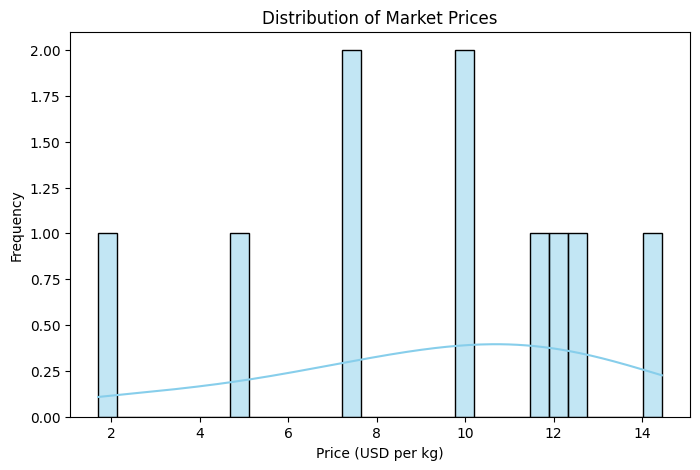

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Market_Price_USD_per_kg'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Market Prices")
plt.xlabel("Price (USD per kg)")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-1645950540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_prices.values, y=city_prices.index, palette='viridis')


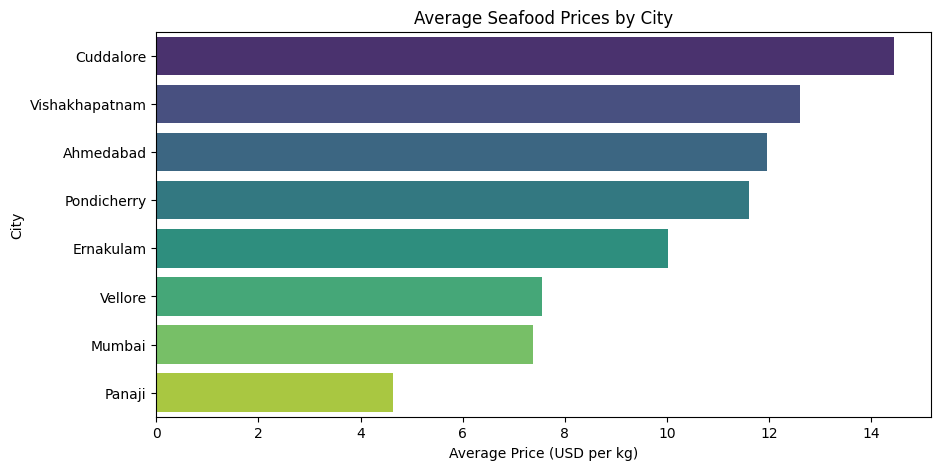

In [8]:
plt.figure(figsize=(10,5))
city_prices = df.groupby('City')['Market_Price_USD_per_kg'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_prices.values, y=city_prices.index, palette='viridis')
plt.title("Average Seafood Prices by City")
plt.xlabel("Average Price (USD per kg)")
plt.ylabel("City")
plt.show()


/tmp/ipython-input-1754187828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_prices.values, y=species_prices.index, palette='coolwarm')


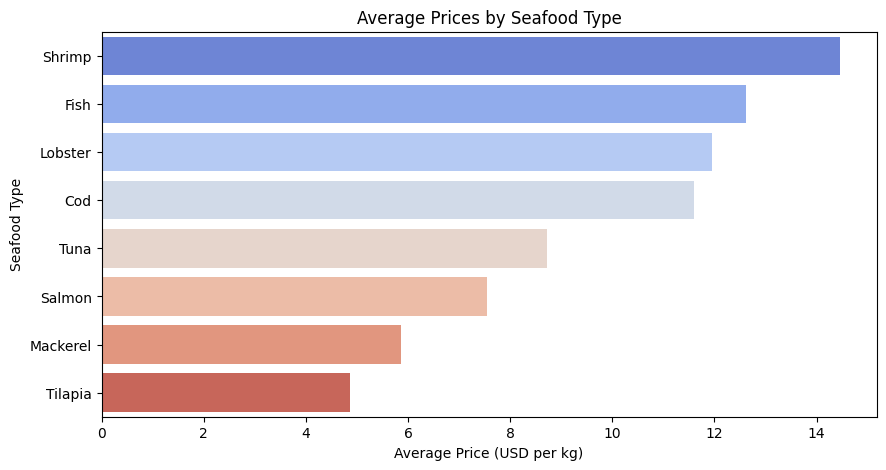

In [9]:
plt.figure(figsize=(10,5))
species_prices = df.groupby('Seafood_Type')['Market_Price_USD_per_kg'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=species_prices.values, y=species_prices.index, palette='coolwarm')
plt.title("Average Prices by Seafood Type")
plt.xlabel("Average Price (USD per kg)")
plt.ylabel("Seafood Type")
plt.show()


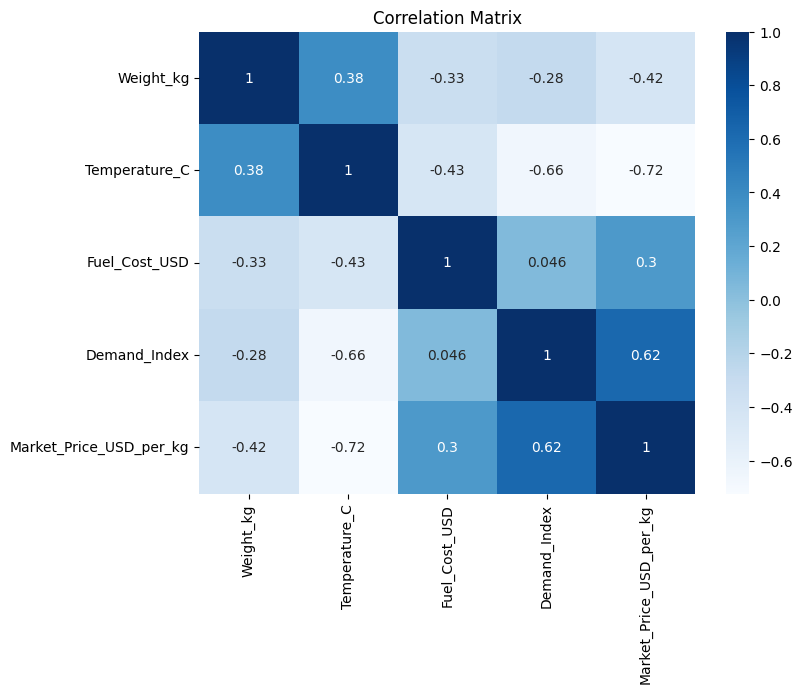

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


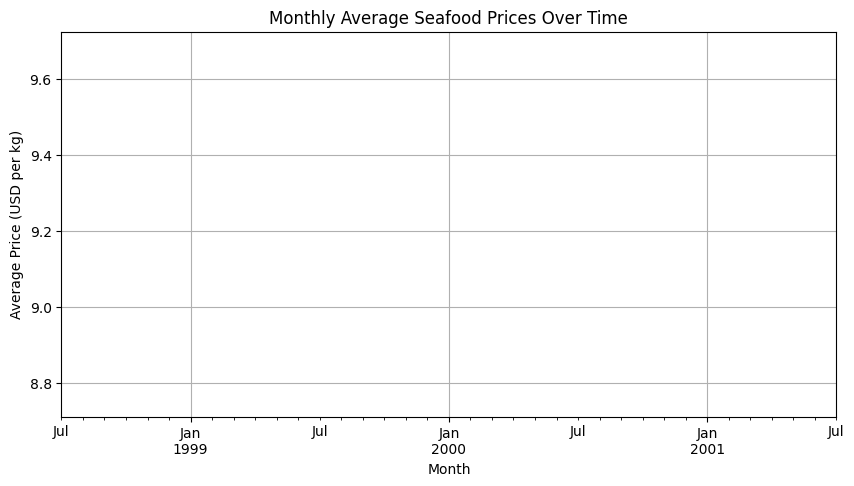

In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d')
df = df.dropna(subset=['Date'])  # drop any weirdly formatted rows

monthly_avg = df.groupby(df['Date'].dt.to_period('M'))['Market_Price_USD_per_kg'].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(color='teal')
plt.title("Monthly Average Seafood Prices Over Time")
plt.xlabel("Month")
plt.ylabel("Average Price (USD per kg)")
plt.grid(True)
plt.show()


In [12]:
# run in a Colab cell (shell)
!pip install xgboost pmdarima --quiet


In [13]:
# run in Python cell: load data & basic preprocessing
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split

PATH = "/content/seafood_prices_2000_2025_indian_cities.csv"  # change if needed
df = pd.read_csv(PATH)

# robust date parsing
df['Date'] = pd.to_datetime(df['Date'].astype(str).str.strip(), errors='coerce', infer_datetime_format=True)
# drop any rows with invalid date or missing target
df = df.dropna(subset=['Date', 'Market_Price_USD_per_kg']).reset_index(drop=True)

# quick numeric cast (safe)
for c in ['Weight_kg','Temperature_C','Fuel_Cost_USD','Demand_Index','Market_Price_USD_per_kg']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# optional: shuffle (keeps reproducible)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Loaded rows:", len(df))
print(df.columns.tolist())


Loaded rows: 10000
['Date', 'Seafood_Type', 'City', 'Weight_kg', 'Temperature_C', 'Fuel_Cost_USD', 'Demand_Index', 'Season', 'Market_Price_USD_per_kg']


/tmp/ipython-input-1288952207.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'].astype(str).str.strip(), errors='coerce', infer_datetime_format=True)


In [14]:
import pandas as pd
import numpy as np

df_feat = df.copy()

# 1️⃣ Extract useful date components
df_feat['Date'] = pd.to_datetime(df_feat['Date'], errors='coerce')
df_feat['Year'] = df_feat['Date'].dt.year
df_feat['Month'] = df_feat['Date'].dt.month
df_feat['Quarter'] = df_feat['Date'].dt.quarter

# 2️⃣ Create interaction features
df_feat['Fuel_x_Demand'] = df_feat['Fuel_Cost_USD'] * df_feat['Demand_Index']
df_feat['Temp_x_Weight'] = df_feat['Temperature_C'] * df_feat['Weight_kg']

# 3️⃣ Convert 'Season' to numeric via one-hot encoding
df_feat = pd.get_dummies(df_feat, columns=['Season', 'Seafood_Type', 'City'], drop_first=True)

df_feat.head()


,Date,Weight_kg,Temperature_C,Fuel_Cost_USD,Demand_Index,Market_Price_USD_per_kg,Year,Month,Quarter,Fuel_x_Demand,...,City_Mangalore,City_Mumbai,City_Panaji,City_Pondicherry,City_Porbandar,City_Surat,City_Thiruvananthapuram,City_Vellore,City_Visakhapatnam,City_Vishakhapatnam
0,2016-02-18,5.49,21.8,2.37,0.51,14.61,2016,2,1,1.2087,...,False,False,False,False,False,False,False,False,False,False
1,2012-03-16,1.69,27.7,0.89,0.86,33.03,2012,3,1,0.7654,...,False,False,False,False,False,False,False,False,False,False
2,2004-07-12,6.81,25.8,1.17,0.41,8.39,2004,7,3,0.4797,...,False,False,False,False,False,False,False,True,False,False
3,2012-05-13,3.54,28.4,2.60,0.32,3.00,2012,5,2,0.8320,...,False,False,False,True,False,False,False,False,False,False
4,2011-09-28,5.30,28.3,1.83,0.67,19.76,2011,9,3,1.2261,...,False,True,False,False,False,False,False,False,False,False


In [15]:
X = df_feat.drop(['Date', 'Market_Price_USD_per_kg'], axis=1)
y = df_feat['Market_Price_USD_per_kg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("RF R²:", round(r2_score(y_test, y_pred_rf), 4))
print("RF RMSE:", round(math.sqrt(mean_squared_error(y_test, y_pred_rf)), 4))
print("RF MAE:", round(mean_absolute_error(y_test, y_pred_rf), 4))


RF R²: 0.9349
RF RMSE: 1.4973
RF MAE: 1.1994


In [17]:
print(X.columns)


Index(['Weight_kg', 'Temperature_C', 'Fuel_Cost_USD', 'Demand_Index', 'Year',
       'Month', 'Quarter', 'Fuel_x_Demand', 'Temp_x_Weight', 'Season_Low',
       'Seafood_Type_Cod', 'Seafood_Type_Crab', 'Seafood_Type_Fish',
       'Seafood_Type_Lobster', 'Seafood_Type_Mackerel', 'Seafood_Type_Salmon',
       'Seafood_Type_Shrimp', 'Seafood_Type_Tilapia', 'Seafood_Type_Tuna',
       'City_Bengaluru', 'City_Chennai', 'City_Cuddalore', 'City_Daman',
       'City_Ernakulam', 'City_Goa Town', 'City_Hyderabad', 'City_Kochi',
       'City_Kolkata', 'City_Mangalore', 'City_Mumbai', 'City_Panaji',
       'City_Pondicherry', 'City_Porbandar', 'City_Surat',
       'City_Thiruvananthapuram', 'City_Vellore', 'City_Visakhapatnam',
       'City_Vishakhapatnam'],
      dtype='object')


In [18]:
from sklearn.metrics import r2_score, mean_squared_error
import math

# assuming rf, X_train, X_test, y_train, y_test exist
train_pred = rf.predict(X_train)
test_pred  = rf.predict(X_test)

print("RF train R²:", round(r2_score(y_train, train_pred), 4))
print("RF test  R²:", round(r2_score(y_test, test_pred), 4))
print("RF train RMSE:", round(math.sqrt(mean_squared_error(y_train, train_pred)),4))
print("RF test  RMSE:", round(math.sqrt(mean_squared_error(y_test, test_pred)),4))


RF train R²: 0.9869
RF test  R²: 0.9349
RF train RMSE: 0.6908
RF test  RMSE: 1.4973


In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2', n_jobs=-1)
print("CV R² scores:", np.round(cv_scores,4))
print("Mean CV R²:", np.round(cv_scores.mean(),4))


CV R² scores: [0.9401 0.9355 0.9355 0.9365 0.9391]
Mean CV R²: 0.9373


In [20]:
corrs = X.corrwith(y).abs().sort_values(ascending=False)
print("Top correlations with target:\n", corrs.head(15))


Top correlations with target:
 Demand_Index             0.668363
Fuel_x_Demand            0.517516
Seafood_Type_Lobster     0.445040
Season_Low               0.210496
Seafood_Type_Fish        0.192525
Seafood_Type_Crab        0.184676
Temperature_C            0.167476
Seafood_Type_Tilapia     0.160283
Seafood_Type_Mackerel    0.131824
Seafood_Type_Shrimp      0.131396
Seafood_Type_Tuna        0.059436
Temp_x_Weight            0.055738
Seafood_Type_Salmon      0.049754
Fuel_Cost_USD            0.048978
City_Mumbai              0.046471
dtype: float64


In [21]:
import pandas as pd
from sklearn.metrics import r2_score

# assuming df is your main dataset
group_means = df.groupby(['City','Seafood_Type'])['Market_Price_USD_per_kg'].mean().rename('gm')
df_with_gm = df.join(group_means, on=['City','Seafood_Type'])

baseline_r2 = r2_score(df_with_gm['Market_Price_USD_per_kg'], df_with_gm['gm'])
print("Baseline (Group Mean) R²:", round(baseline_r2, 4))


Baseline (Group Mean) R²: 0.3738


In [22]:
from sklearn.model_selection import GroupKFold

groups = df['City'].values
gkf = GroupKFold(n_splits=5)
cv_scores = cross_val_score(rf, X, y, cv=gkf, groups=groups, scoring='r2', n_jobs=-1)

print("GroupKFold by City R²:", np.round(cv_scores, 4))
print("Mean:", np.round(cv_scores.mean(), 4))


GroupKFold by City R²: [0.9294 0.9451 0.9259 0.9432 0.9354]
Mean: 0.9358


In [23]:
pip install xgboost


In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
import joblib
import os

# Ensure the models directory exists
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Initialize model
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_train_pred_xgb = xgb.predict(X_train)

# Metrics
print("XGBoost Train R²:", round(r2_score(y_train, y_train_pred_xgb), 4))
print("XGBoost Test R²:", round(r2_score(y_test, y_pred_xgb), 4))
print("XGBoost RMSE:", round(math.sqrt(mean_squared_error(y_test, y_pred_xgb)), 4))
print("XGBoost MAE:", round(mean_absolute_error(y_test, y_pred_xgb), 4))

# Save the trained XGBoost model
xgb_path = os.path.join(MODEL_DIR, "xgboost.joblib")
joblib.dump(xgb, xgb_path)
print(f"Saved XGBoost model to {xgb_path}")

XGBoost Train R²: 0.9995
XGBoost Test R²: 0.9413
XGBoost RMSE: 1.4217
XGBoost MAE: 1.1261


In [25]:
print("Columns in X:")
print(X.columns.tolist())

# Check for any suspicious correlations with target
import pandas as pd
corrs = X.corrwith(y).abs().sort_values(ascending=False)
print("\nTop correlated features:")
print(corrs.head(10))


Columns in X:
['Weight_kg', 'Temperature_C', 'Fuel_Cost_USD', 'Demand_Index', 'Year', 'Month', 'Quarter', 'Fuel_x_Demand', 'Temp_x_Weight', 'Season_Low', 'Seafood_Type_Cod', 'Seafood_Type_Crab', 'Seafood_Type_Fish', 'Seafood_Type_Lobster', 'Seafood_Type_Mackerel', 'Seafood_Type_Salmon', 'Seafood_Type_Shrimp', 'Seafood_Type_Tilapia', 'Seafood_Type_Tuna', 'City_Bengaluru', 'City_Chennai', 'City_Cuddalore', 'City_Daman', 'City_Ernakulam', 'City_Goa Town', 'City_Hyderabad', 'City_Kochi', 'City_Kolkata', 'City_Mangalore', 'City_Mumbai', 'City_Panaji', 'City_Pondicherry', 'City_Porbandar', 'City_Surat', 'City_Thiruvananthapuram', 'City_Vellore', 'City_Visakhapatnam', 'City_Vishakhapatnam']

Top correlated features:
Demand_Index             0.668363
Fuel_x_Demand            0.517516
Seafood_Type_Lobster     0.445040
Season_Low               0.210496
Seafood_Type_Fish        0.192525
Seafood_Type_Crab        0.184676
Temperature_C            0.167476
Seafood_Type_Tilapia     0.160283
Seafood_T

In [26]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import numpy as np

r2_scores = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=10,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    r2_scores.append(r2_score(y_test, model.predict(X_test)))

print("R² scores across 5 random splits:", np.round(r2_scores, 4))
print("Mean R²:", round(np.mean(r2_scores), 4))


R² scores across 5 random splits: [0.9426 0.9428 0.9441 0.943  0.9466]
Mean R²: 0.9438


In [27]:
import pandas as pd
feat_imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_imp.head(15))


Seafood_Type_Lobster     0.522711
Seafood_Type_Crab        0.126744
Seafood_Type_Shrimp      0.079491
Demand_Index             0.046185
Seafood_Type_Salmon      0.042468
Season_Low               0.034237
Seafood_Type_Fish        0.026130
Seafood_Type_Cod         0.023498
Seafood_Type_Tuna        0.017610
Seafood_Type_Tilapia     0.016230
Seafood_Type_Mackerel    0.013724
Fuel_x_Demand            0.005727
City_Mumbai              0.005335
City_Goa Town            0.004193
City_Vellore             0.002876
dtype: float32


In [37]:
# ===== Shared settings (run once) =====
DATA_PATH = "/content/seafood_prices_2000_2025_indian_cities.csv"  # <--- change if needed
CITY = None        # e.g. "Panaji" or None for all cities
SPECIES = None     # e.g. "Mackerel" or None for all species
HOLDOUT_MONTHS = 12  # last N months are held out for test

import pandas as pd, numpy as np
pd.options.plotting.backend = "matplotlib"
import os
import joblib
import json

# Define the directory for models and feature list
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)
RF_MODEL_PATH = os.path.join(MODEL_DIR, "random_forest.joblib")
XGB_MODEL_PATH = os.path.join(MODEL_DIR, "xgboost.joblib")
FEATURE_LIST_PATH = os.path.join(MODEL_DIR, "feature_list.json")


# load & prepare monthly averaged series
df = pd.read_csv(DATA_PATH)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date','Market_Price_USD_per_kg']).copy()

if CITY is not None:
    df = df[df['City']==CITY].copy()
if SPECIES is not None:
    df = df[df['Seafood_Type']==SPECIES].copy()

# monthly mean series (frequency = month start)
ts = df.set_index('Date')['Market_Price_USD_per_kg'].resample('M').mean().asfreq('M')
# simple interpolation for any missing months (linear time interpolation)
ts = ts.interpolate(method='time').fillna(method='ffill').fillna(method='bfill')

print("Series points:", len(ts), ts.index.min().date(), "->", ts.index.max().date())

# --- Load Feature List and Models ---
feature_names = None
rf_model = None
xgb_model = None

try:
    with open(FEATURE_LIST_PATH, 'r') as f:
        feature_names = json.load(f)
    print(f"Loaded feature list from {FEATURE_LIST_PATH}")
except FileNotFoundError:
    print(f"Feature list not found at {FEATURE_LIST_PATH}")

try:
    rf_model = joblib.load(RF_MODEL_PATH)
    print(f"Loaded Random Forest model from {RF_MODEL_PATH}")
except FileNotFoundError:
    print(f"RF model not found at {RF_MODEL_PATH}")

try:
    xgb_model = joblib.load(XGB_MODEL_PATH)
    print(f"Loaded XGBoost model from {XGB_MODEL_PATH}")
except FileNotFoundError:
    print(f"XGB model not found at {XGB_MODEL_PATH}")

# Ensure feature_names is updated with correct training columns after feature engineering
# This assumes X is created in a subsequent cell after feature engineering
# For robustness, feature engineering should ideally happen before this cell or X passed here.
# As a workaround, we'll rely on X being in the global scope after feature engineering.
# A better approach would be to regenerate and save feature_names here after loading and potentially filtering df.

# Assuming df_feat and X are available from previous cells after feature engineering
if 'X' in globals():
    feature_names = X.columns.tolist()
    with open(FEATURE_LIST_PATH, 'w') as f:
        json.dump(feature_names, f)
    print(f"Updated and saved feature list to {FEATURE_LIST_PATH}")
else:
    print("Warning: X not found in global scope. Feature list not updated.")

Series points: 312 2000-01-31 -> 2025-12-31


/tmp/ipython-input-4215017698.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df.set_index('Date')['Market_Price_USD_per_kg'].resample('M').mean().asfreq('M')
/tmp/ipython-input-4215017698.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = ts.interpolate(method='time').fillna(method='ffill').fillna(method='bfill')


RF holdout — RMSE: 1.471, MAE: 1.149, R²: -0.160


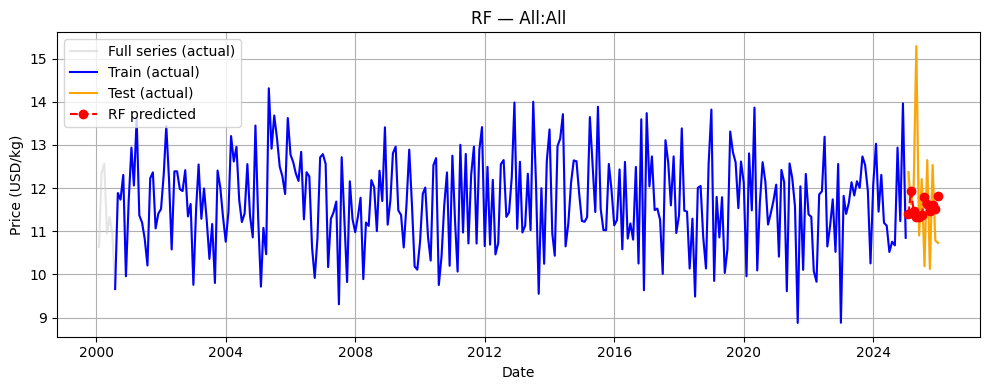

Saved: outputs/RF_ALL_ALL.png outputs/RF_preds_ALL_ALL.csv


In [38]:
# ===== Random Forest using lag features =====
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import math, os

# create supervised dataset with lag features
def make_lag_features(series, nlags=6):
    dfX = pd.DataFrame({'y': series})
    for lag in range(1, nlags+1):
        dfX[f'lag_{lag}'] = dfX['y'].shift(lag)
    # time features
    dfX['month'] = dfX.index.month
    dfX['year']  = dfX.index.year
    dfX = dfX.dropna()
    return dfX

nlags = 6
data = make_lag_features(ts, nlags=nlags)

# time split: last HOLDOUT_MONTHS months for test
test_len = HOLDOUT_MONTHS
train_df = data.iloc[:-test_len]
test_df  = data.iloc[-test_len:]

X_train = train_df.drop(columns=['y']).values
y_train = train_df['y'].values
X_test  = test_df.drop(columns=['y']).values
y_test  = test_df['y'].values
test_idx = test_df.index

# train RF
rf = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# predict on holdout
y_pred = rf.predict(X_test)

# metrics
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
print(f"RF holdout — RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

# plot: train actual, test actual, predicted
plt.figure(figsize=(10,4))
plt.plot(ts.index, ts.values, color='lightgray', label='Full series (actual)', alpha=0.6)
plt.plot(train_df.index, train_df['y'].values, label='Train (actual)', color='blue')
plt.plot(test_idx, y_test, label='Test (actual)', color='orange')
plt.plot(test_idx, y_pred, label='RF predicted', color='red', linestyle='--', marker='o')
plt.title(f"RF — {('All' if CITY is None else CITY)}:{('All' if SPECIES is None else SPECIES)}")
plt.xlabel("Date"); plt.ylabel("Price (USD/kg)"); plt.legend(); plt.grid(True); plt.tight_layout()

os.makedirs("outputs", exist_ok=True)
png = f"outputs/RF_{('ALL' if CITY is None else CITY)}_{('ALL' if SPECIES is None else SPECIES)}.png".replace(" ", "_")
csv_out = f"outputs/RF_preds_{('ALL' if CITY is None else CITY)}_{('ALL' if SPECIES is None else SPECIES)}.csv".replace(" ", "_")
plt.savefig(png, dpi=150); plt.show()

import pandas as pd
pd.DataFrame({"date": test_idx, "actual": y_test, "rf_pred": y_pred}).to_csv(csv_out, index=False)
print("Saved:", png, csv_out)


XGB holdout — RMSE: 1.436, MAE: 1.079, R²: -0.105


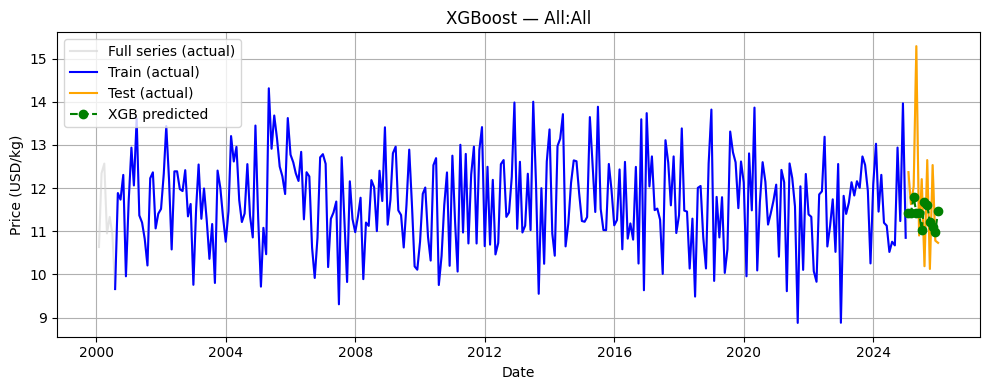

Saved: outputs/XGB_ALL_ALL.png outputs/XGB_preds_ALL_ALL.csv


In [39]:
# ===== XGBoost using same lag features =====
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import math, os

# reuse 'data' made earlier (lag features)
train_df = data.iloc[:-HOLDOUT_MONTHS]
test_df  = data.iloc[-HOLDOUT_MONTHS:]
X_train = train_df.drop(columns=['y']).values
y_train = train_df['y'].values
X_test  = test_df.drop(columns=['y']).values
y_test  = test_df['y'].values
test_idx = test_df.index

# train XGBoost
xgb = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1, verbosity=0)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
print(f"XGB holdout — RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

plt.figure(figsize=(10,4))
plt.plot(ts.index, ts.values, color='lightgray', label='Full series (actual)', alpha=0.6)
plt.plot(train_df.index, train_df['y'].values, label='Train (actual)', color='blue')
plt.plot(test_idx, y_test, label='Test (actual)', color='orange')
plt.plot(test_idx, y_pred, label='XGB predicted', color='green', linestyle='--', marker='o')
plt.title(f"XGBoost — {('All' if CITY is None else CITY)}:{('All' if SPECIES is None else SPECIES)}")
plt.xlabel("Date"); plt.ylabel("Price (USD/kg)"); plt.legend(); plt.grid(True); plt.tight_layout()

os.makedirs("outputs", exist_ok=True)
png = f"outputs/XGB_{('ALL' if CITY is None else CITY)}_{('ALL' if SPECIES is None else SPECIES)}.png".replace(" ", "_")
csv_out = f"outputs/XGB_preds_{('ALL' if CITY is None else CITY)}_{('ALL' if SPECIES is None else SPECIES)}.csv".replace(" ", "_")
plt.savefig(png, dpi=150); plt.show()

pd.DataFrame({"date": test_idx, "actual": y_test, "xgb_pred": y_pred}).to_csv(csv_out, index=False)
print("Saved:", png, csv_out)


Train points: 300 Holdout: 12
Selected SARIMAX order: ((1, 0, 1), (0, 1, 1, 12)) AIC: 865.2426394888089
SARIMAX holdout -> RMSE: 1.378, MAE: 1.083


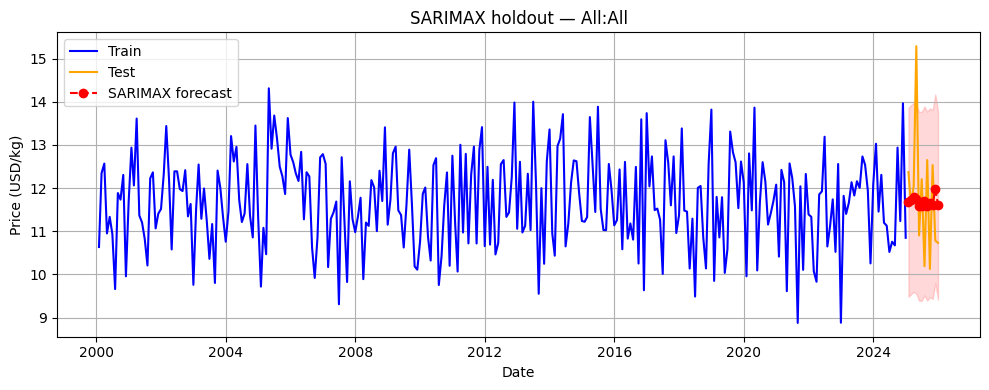

Saved: outputs/SARIMAX_ALL_ALL.png outputs/SARIMAX_preds_ALL_ALL.csv


In [40]:
# ===== SARIMAX (seasonal) holdout + future forecast =====
import pandas as pd, numpy as np, matplotlib.pyplot as plt, math, os
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# monthly ts already in 'ts'
# holdout last HOLDOUT_MONTHS
h = HOLDOUT_MONTHS
train_ts = ts[:-h]
test_ts  = ts[-h:]

print("Train points:", len(train_ts), "Holdout:", len(test_ts))

# small SARIMAX candidate list (keeps runtime reasonable)
candidates = [((0,0,0),(0,0,0,12)), ((1,0,0),(0,0,0,12)), ((1,0,1),(0,1,1,12)),
              ((0,1,1),(0,1,1,12)), ((1,1,1),(0,1,1,12))]
best = None; best_aic = np.inf; best_cfg = None

for (p,d,q),(P,D,Q,m) in candidates:
    try:
        mod = SARIMAX(train_ts, order=(p,d,q), seasonal_order=(P,D,Q,m),
                      enforce_stationarity=False, enforce_invertibility=False)
        res = mod.fit(disp=False, maxiter=200)
        if res.aic < best_aic:
            best_aic = res.aic; best = res; best_cfg = ((p,d,q),(P,D,Q,m))
    except Exception:
        continue

if best is None:
    # fallback: simple persistence / mean
    print("SARIMAX candidates failed. Using mean forecast fallback.")
    forecast_hold = pd.Series([train_ts.mean()]*len(test_ts), index=test_ts.index)
    lower = forecast_hold*0.9; upper = forecast_hold*1.1
else:
    print("Selected SARIMAX order:", best_cfg, "AIC:", best_aic)
    pred = best.get_forecast(steps=len(test_ts))
    forecast_hold = pred.predicted_mean
    ci = pred.conf_int()
    lower = ci.iloc[:,0]; upper = ci.iloc[:,1]
    forecast_hold.index = test_ts.index

# evaluate
mse = mean_squared_error(test_ts, forecast_hold); rmse = math.sqrt(mse); mae = mean_absolute_error(test_ts, forecast_hold)
print(f"SARIMAX holdout -> RMSE: {rmse:.3f}, MAE: {mae:.3f}")

# plot holdout
plt.figure(figsize=(10,4))
plt.plot(train_ts.index, train_ts.values, label='Train', color='blue')
plt.plot(test_ts.index, test_ts.values, label='Test', color='orange')
plt.plot(forecast_hold.index, forecast_hold.values, label='SARIMAX forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_hold.index, lower, upper, color='red', alpha=0.15)
plt.title(f"SARIMAX holdout — {('All' if CITY is None else CITY)}:{('All' if SPECIES is None else SPECIES)}")
plt.xlabel("Date"); plt.ylabel("Price (USD/kg)"); plt.legend(); plt.grid(True); plt.tight_layout()

os.makedirs("outputs", exist_ok=True)
png = f"outputs/SARIMAX_{('ALL' if CITY is None else CITY)}_{('ALL' if SPECIES is None else SPECIES)}.png".replace(" ", "_")
csv_out = f"outputs/SARIMAX_preds_{('ALL' if CITY is None else CITY)}_{('ALL' if SPECIES is None else SPECIES)}.csv".replace(" ", "_")
plt.savefig(png, dpi=150); plt.show()

pd.DataFrame({"date": test_ts.index, "actual": test_ts.values, "sarimax_forecast": forecast_hold.values, "lower": lower.values, "upper": upper.values}).to_csv(csv_out, index=False)
print("Saved:", png, csv_out)


In [48]:
# Fix matplotlib style issue
import matplotlib.pyplot as plt

# Clear any bad style calls
plt.rcParams.update(plt.rcParamsDefault)

# Set simple grid manually (no seaborn dependency)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['font.size'] = 10
plt.rcParams['figure.facecolor'] = 'white'

print("✅ Matplotlib style reset — safe to run plots now.")


✅ Matplotlib style reset — safe to run plots now.


Running for -> City: Panaji  |  Species: Mackerel
Series points: 311 2000-01-31 -> 2025-11-30
Using holdout months: 12
RF holdout — RMSE: 0.528, MAE: 0.415, R²: 0.968


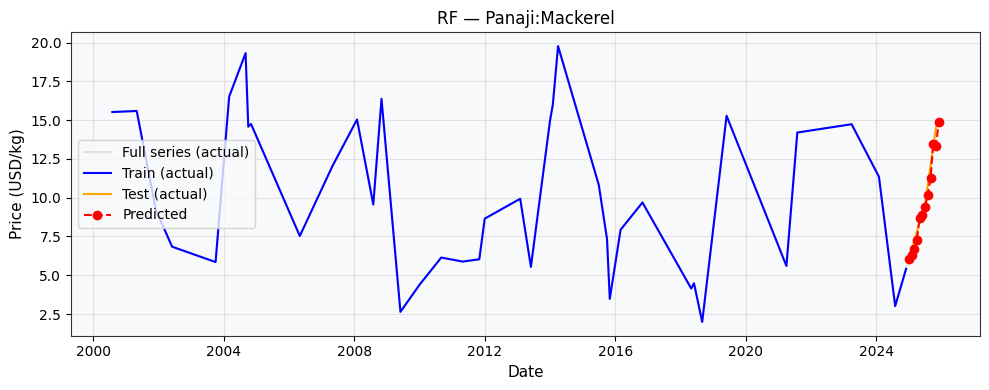

Saved: outputs/RF_Panaji_Mackerel.png
XGB holdout — RMSE: 0.567, MAE: 0.436, R²: 0.963


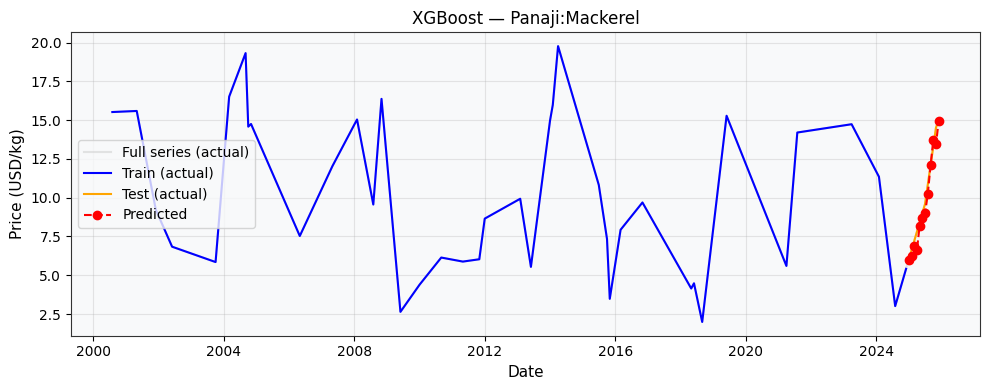

Saved: outputs/XGB_Panaji_Mackerel.png
Train points: 299 Holdout: 12
Selected SARIMAX order: ((1, 1, 1), (0, 1, 1, 12)) AIC: 644.765093685442
SARIMAX holdout -> RMSE: 5.308, MAE: 4.285, R²: -2.228


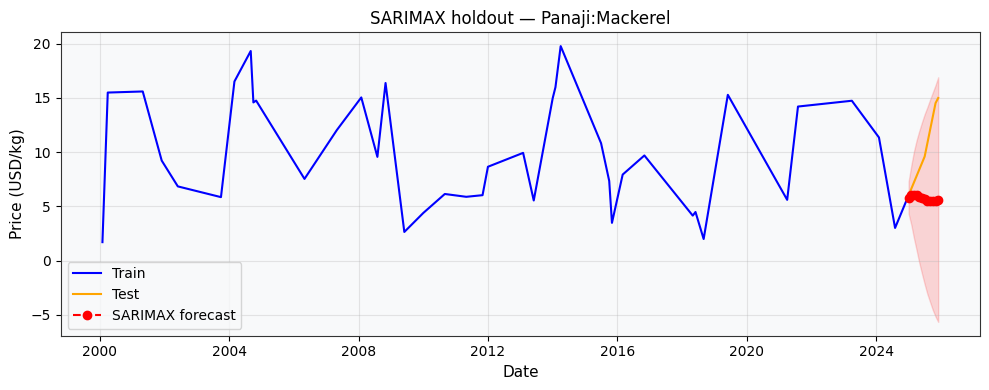

Saved: outputs/SARIMAX_Panaji_Mackerel.png

Done — all PNGs & CSVs in ./outputs/


In [50]:
# ===== Single-run: RF, XGB, SARIMAX for one CITY:SPECIES (no input) =====
DATA_PATH = "/content/seafood_prices_2000_2025_indian_cities.csv"  # <- change if needed
CITY = "Panaji"       # <- set your city here
SPECIES = "Mackerel"  # <- set your species here
HOLDOUT_MONTHS = 12

import os, math, warnings
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")
# Removed: plt.style.use("seaborn-whitegrid")

# helpers
def load_and_prepare(data_path, city=None, species=None):
    df = pd.read_csv(data_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date','Market_Price_USD_per_kg']).copy()
    if city:
        df = df[df['City']==city].copy()
    if species:
        df = df[df['Seafood_Type']==species].copy()
    if df.empty:
        raise ValueError("No rows match City/Species filter.")
    ts = df.set_index('Date')['Market_Price_USD_per_kg'].resample('M').mean().asfreq('M')
    ts = ts.interpolate(method='time').fillna(method='ffill').fillna(method='bfill')
    return ts

def make_lag_features(series, nlags=6):
    dfX = pd.DataFrame({'y': series})
    for lag in range(1, nlags+1):
        dfX[f'lag_{lag}'] = dfX['y'].shift(lag)
    dfX['month'] = dfX.index.month
    dfX['year'] = dfX.index.year
    dfX = dfX.dropna()
    return dfX

def plot_and_save(train_idx, train_y, test_idx, test_y, pred_idx, pred_y, title, out_prefix):
    plt.figure(figsize=(10,4))
    full_idx = train_idx.union(test_idx)
    plt.plot(full_idx, pd.concat([pd.Series(train_y, index=train_idx), pd.Series(test_y, index=test_idx)]),
             color='lightgray', label='Full series (actual)', alpha=0.6)
    plt.plot(train_idx, train_y, label='Train (actual)', color='blue')
    plt.plot(test_idx, test_y, label='Test (actual)', color='orange')
    plt.plot(pred_idx, pred_y, label='Predicted', color='red', linestyle='--', marker='o')
    plt.title(title); plt.xlabel("Date"); plt.ylabel("Price (USD/kg)"); plt.legend(); plt.grid(True); plt.tight_layout()
    os.makedirs("outputs", exist_ok=True)
    png = f"outputs/{out_prefix}.png".replace(" ", "_")
    plt.savefig(png, dpi=150); plt.show()
    return png

# main
print(f"Running for -> City: {CITY}  |  Species: {SPECIES}")
ts = load_and_prepare(DATA_PATH, city=CITY, species=SPECIES)
print("Series points:", len(ts), ts.index.min().date(), "->", ts.index.max().date())

if len(ts) < 12:
    raise SystemExit("Series too short (<12 months) — cannot hold out 12 months.")

h = min(HOLDOUT_MONTHS, max(3, len(ts)//6))
print("Using holdout months:", h)

nlags = 6
data = make_lag_features(ts, nlags=nlags)
if len(data) < (h+3):
    nlags = 3
    data = make_lag_features(ts, nlags=nlags)
    print("Reduced nlags to", nlags, "due to short series.")

train_df = data.iloc[:-h]
test_df  = data.iloc[-h:]
X_train = train_df.drop(columns=['y']).values; y_train = train_df['y'].values
X_test  = test_df.drop(columns=['y']).values; y_test  = test_df['y'].values
test_idx = test_df.index

# Random Forest
rf = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = math.sqrt(mean_squared_error(y_test, rf_pred)); rf_mae = mean_absolute_error(y_test, rf_pred); rf_r2 = r2_score(y_test, rf_pred)
print(f"RF holdout — RMSE: {rf_rmse:.3f}, MAE: {rf_mae:.3f}, R²: {rf_r2:.3f}")
png_rf = plot_and_save(train_df.index, y_train, test_idx, y_test, test_idx, rf_pred, f"RF — {CITY}:{SPECIES}", f"RF_{CITY}_{SPECIES}")
pd.DataFrame({"date": test_idx, "actual": y_test, "rf_pred": rf_pred}).to_csv(f"outputs/RF_preds_{CITY}_{SPECIES}.csv".replace(" ", "_"), index=False)
print("Saved:", png_rf)

# XGBoost
xgb = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1, verbosity=0)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_rmse = math.sqrt(mean_squared_error(y_test, xgb_pred)); xgb_mae = mean_absolute_error(y_test, xgb_pred); xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGB holdout — RMSE: {xgb_rmse:.3f}, MAE: {xgb_mae:.3f}, R²: {xgb_r2:.3f}")
png_xgb = plot_and_save(train_df.index, y_train, test_idx, y_test, test_idx, xgb_pred, f"XGBoost — {CITY}:{SPECIES}", f"XGB_{CITY}_{SPECIES}")
pd.DataFrame({"date": test_idx, "actual": y_test, "xgb_pred": xgb_pred}).to_csv(f"outputs/XGB_preds_{CITY}_{SPECIES}.csv".replace(" ", "_"), index=False)
print("Saved:", png_xgb)

# SARIMAX
train_ts = ts[:-h]; test_ts = ts[-h:]
print("Train points:", len(train_ts), "Holdout:", len(test_ts))
candidates = [((0,0,0),(0,0,0,12)), ((1,0,0),(0,1,1,12)), ((1,0,1),(0,1,1,12)),
              ((0,1,1),(0,1,1,12)), ((1,1,1),(0,1,1,12))]
best=None; best_aic=np.inf; best_cfg=None
for (p,d,q),(P,D,Q,m) in candidates:
    try:
        mod = SARIMAX(train_ts, order=(p,d,q), seasonal_order=(P,D,Q,m), enforce_stationarity=False, enforce_invertibility=False)
        res = mod.fit(disp=False, maxiter=200)
        if res.aic < best_aic:
            best_aic = res.aic; best = res; best_cfg=((p,d,q),(P,D,Q,m))
    except Exception:
        continue

if best is None:
    print("SARIMAX candidates failed -> using train mean fallback.")
    forecast_hold = pd.Series([train_ts.mean()]*len(test_ts), index=test_ts.index)
    lower = forecast_hold*0.9; upper = forecast_hold*1.1
else:
    print("Selected SARIMAX order:", best_cfg, "AIC:", best_aic)
    pred = best.get_forecast(steps=len(test_ts))
    forecast_hold = pred.predicted_mean
    ci = pred.conf_int()
    lower = ci.iloc[:,0]; upper = ci.iloc[:,1]
    forecast_hold.index = test_ts.index

sarimax_rmse = math.sqrt(mean_squared_error(test_ts, forecast_hold))
sarimax_mae = mean_absolute_error(test_ts, forecast_hold)
try:
    sarimax_r2 = r2_score(test_ts, forecast_hold)
except Exception:
    sarimax_r2 = float('nan')
print(f"SARIMAX holdout -> RMSE: {sarimax_rmse:.3f}, MAE: {sarimax_mae:.3f}, R²: {sarimax_r2:.3f}")

plt.figure(figsize=(10,4))
plt.plot(train_ts.index, train_ts.values, label='Train', color='blue')
plt.plot(test_ts.index, test_ts.values, label='Test', color='orange')
plt.plot(forecast_hold.index, forecast_hold.values, label='SARIMAX forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_hold.index, lower, upper, color='red', alpha=0.15)
plt.title(f"SARIMAX holdout — {CITY}:{SPECIES}")
plt.xlabel("Date"); plt.ylabel("Price (USD/kg)"); plt.legend(); plt.grid(True); plt.tight_layout()
png_sar = f"outputs/SARIMAX_{CITY}_{SPECIES}.png".replace(" ", "_")
plt.savefig(png_sar, dpi=150); plt.show()
pd.DataFrame({"date": test_ts.index, "actual": test_ts.values, "sarimax_pred": forecast_hold.values, "lower": lower.values, "upper": upper.values}).to_csv(f"outputs/SARIMAX_preds_{CITY}_{SPECIES}.csv".replace(" ", "_"), index=False)
print("Saved:", png_sar)

print("\nDone — all PNGs & CSVs in ./outputs/")